In [1]:
import pandas as pd
import numpy as np
import os
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_blobs
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
os.environ["OMP_NUM_THREADS"] = "1"

In [ ]:
df = pd.read_csv('./../CSVs/lithium-reciclying-plants.csv', delimiter=';')
df

,WKT,name,description
0,POINT (-77.67829119999999 43.1981518),Li-Cycle New York Spoke,Expects to use a hydrometallurgical process an...
1,POINT (-111.7696764 32.87824409999999),Quemetco Metals Ltd Inc,Quemetco Metals Ltd Inc - Ecobat. It will init...
2,POINT (-95.46281119999999 29.7386312),ACE Green Recycling,https://www.acegreenrecycling.com/ It plans to...
3,POINT (-119.7414856 39.204376),Redwood Materials,"Unspecified capacity, up to 95% material recov..."
4,POINT (-119.8217446 39.5242032),American Battery Technology Company,"https://americanbatterytechnology.com 20,000 t..."
5,POINT (-119.4399422 39.53570729999999),Tesla Giga Nevada,"Tesla Gigafactory 1, located in Sparks, Nevada..."
6,POINT (-83.84230749999999 33.6122481),Ascend Elements,"""Inc.,Unspecified capacity, recycling process..."


In [3]:
df[['lon', 'lat']] = df['WKT'].str.extract(r'POINT \(([^ ]+) ([^)]+)\)').astype(float)
df

,WKT,name,description,lon,lat
0,POINT (-77.67829119999999 43.1981518),Li-Cycle New York Spoke,Expects to use a hydrometallurgical process an...,-77.678291,43.198152
1,POINT (-111.7696764 32.87824409999999),Quemetco Metals Ltd Inc,Quemetco Metals Ltd Inc - Ecobat. It will init...,-111.769676,32.878244
2,POINT (-95.46281119999999 29.7386312),ACE Green Recycling,https://www.acegreenrecycling.com/ It plans to...,-95.462811,29.738631
3,POINT (-119.7414856 39.204376),Redwood Materials,"Unspecified capacity, up to 95% material recov...",-119.741486,39.204376
4,POINT (-119.8217446 39.5242032),American Battery Technology Company,"https://americanbatterytechnology.com 20,000 t...",-119.821745,39.524203
5,POINT (-119.4399422 39.53570729999999),Tesla Giga Nevada,"Tesla Gigafactory 1, located in Sparks, Nevada...",-119.439942,39.535707
6,POINT (-83.84230749999999 33.6122481),Ascend Elements,"""Inc.,Unspecified capacity, recycling process...",-83.842307,33.612248


In [4]:
df = df.drop(index=6)
df = df.drop(index=0)

In [5]:
X = df[['lat', 'lon']]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [6]:
k_values = range(2, 5)
silhouette_scores = []

In [7]:
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    cluster_labels = kmeans.fit_predict(X_scaled)
    silhouette_scores.append(silhouette_score(X_scaled, cluster_labels))

c:\Users\kevin\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\kevin\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\kevin\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


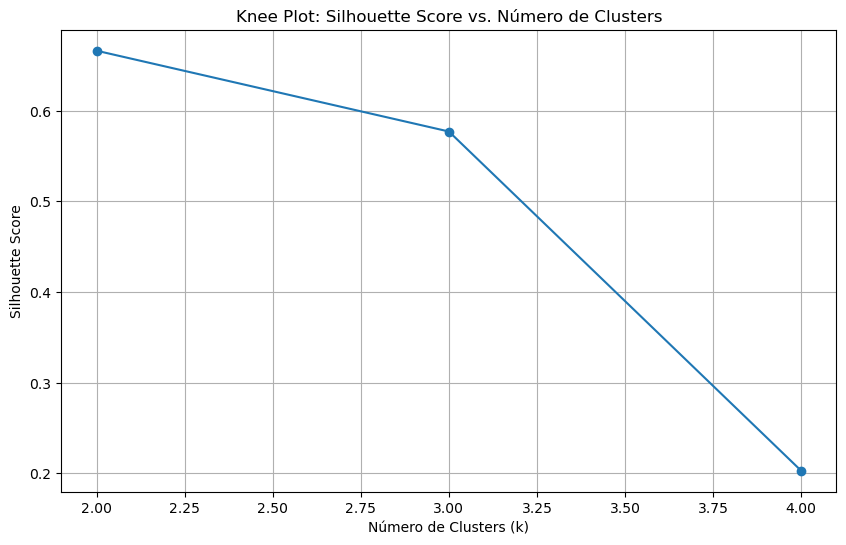

In [8]:
plt.figure(figsize=(10, 6))
plt.plot(k_values, silhouette_scores, marker='o', linestyle='-')
plt.xlabel('Número de Clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Knee Plot: Silhouette Score vs. Número de Clusters')
plt.grid(True)
plt.show()

In [9]:
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
cluster_labels = kmeans.fit_predict(X)
sil_score = silhouette_score(X, cluster_labels)
print(f"Silhouette Score: {sil_score:.4f}")

Silhouette Score: 0.5774


c:\Users\kevin\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [10]:
if X.shape[1] > 2:
    pca = PCA(n_components=2)
    X_pca = pca.fit_transform(X)
else:
    X_pca = X.values

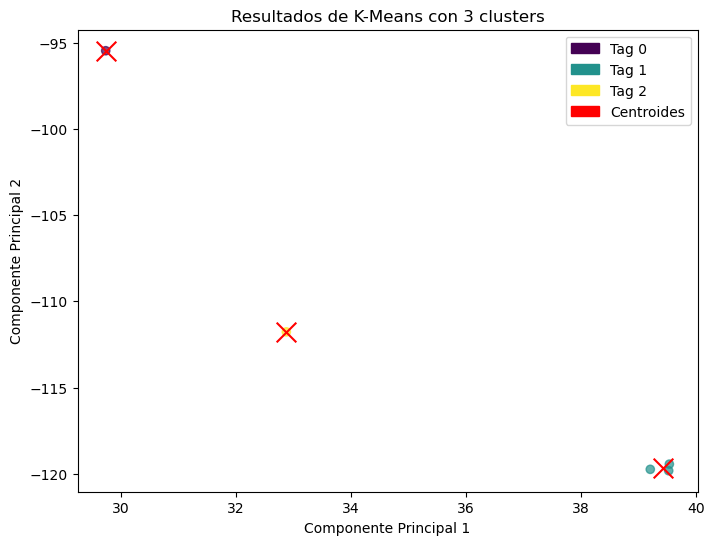

In [11]:
unique_labels = np.unique(cluster_labels)
colors = [plt.cm.viridis(i / (len(unique_labels) - 1)) for i in range(len(unique_labels))]

plt.figure(figsize=(8, 6))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=cluster_labels, cmap='viridis', alpha=0.7)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c='red', marker='x', s=200, label='Centroides')

legend_patches = [mpatches.Patch(color=colors[i], label=f'Tag {unique_labels[i]}') for i in range(len(unique_labels))]
plt.legend(handles=legend_patches + [mpatches.Patch(color='red', label='Centroides')])

plt.xlabel("Componente Principal 1")
plt.ylabel("Componente Principal 2")
plt.title(f"Resultados de K-Means con {3} clusters")

plt.show()